# **10장. 회귀분석**

In [ ]:
#회귀분석 : 어떤 사건에 대한 여러 요인의 영향력을 파악하고 비교할 수 있음.
#상관분석으로 두 변수의 선형 상관도를 판단할 수 있으나 이것이 인과관계를 나타내지는 않음
#선형 회귀분석(Linear regression analysis) : 데이터를 하나의 직선으로 이어 일차함수로 일반화하는 데이터 분석 방법
#로지스틱 회귀분석 : 결과 사건의 발생 확률로 원인 사건의 영향력을 수치화하는 데이터 분석 방법

In [ ]:
#선형 회귀분석
# - x 변수(독립변수, Independent variable)가 원인, y 변수(종속변수, Dependent Variable가 결과
# - 독립변수는 한 개 이상, 종속변수는 단 한개만 존재
# - 독립변수가 한 개이면 단순 선형 회귀분석, 독립변수가 두 개이상이면 다중 선형 회귀분석
# - 잔차(Residual) : 점이 가리키는 값과 직선이 예측하는 값의 차
# - 결정계수(R square) : 모형이 데이터의 패턴을 얼마나 효과적으로 보여주는지 수치화한 값
#                        0 이상 1이하의 값으로 계산됨. 1에 가까워질수록 잔차가 작고 예측의 정말도가 높음.
# - 편차(Deviation) : 평균과 실제 값의 차이
# - 수정된 결정계수(adjusted R square) : 독립변수의 개수가 많을수록 커지는 결정계수의 문제점을 보완하기 위해 수정된 결정계수. 다중 선형 회귀분석에서 사용

# 선형 회귀분석의 해석
# - 통계적 가설검정(Statistical hypothesis test) : 통계적 추측 방법, 모집단에 대한 추측(가설)을 하고 표본의 정보를 기준으로 그 가설이 타당한지 판정하는 방법
# - 귀무가설(Null hypothesis) : 처음부터 거짓일 것으로 기대하는 가설
# - 대립가설(Alternative hypothesis) : 입증하고자 하는 가설
# - 유의수준(Significance level), p-값(p-value, 유의확률)

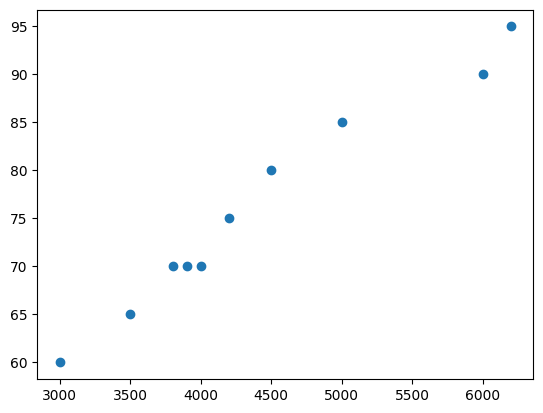

In [ ]:
# 연봉과 직장 만족도

import pandas as pd
import matplotlib.pyplot as plt

x = [3000, 4200, 4000, 5000, 6000, 3800, 3500, 6200, 3900, 4500]
y = [60, 75, 70, 85, 90, 70, 65, 95, 70, 80]
data = {'x' : x, 'y': y}
df = pd.DataFrame(data)
plt.scatter(df['x'], df['y'])
plt.show()

In [ ]:
#단순 선형 회귀분석

from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression #sklearn.linear_model: 선형 회귀분석 라이브러리

fit = ols('y~x', data=df).fit() # ols() : 선형 회귀분석을 수행하는 함수
print(fit.summary())

#결정계수 R의 값이 0.971로, 표본 데이터들에 대한 설명력이 97.1%이다.
#회귀모형의 독립변수는 x 한개이며, x의 유의수준은 0.000으로 0.05미만 -> x는 유의한 독립변수이다.
#독립변수 x의 계수는 0.0107
#회귀모형 : y = 0.0107x + 29.0004 + e

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     271.0
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           1.87e-07
Time:                        07:49:08   Log-Likelihood:                -20.111
No. Observations:                  10   AIC:                             44.22
Df Residuals:                       8   BIC:                             44.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.0004      2.926      9.913      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
#다중 선형 회귀분석

from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

salary = [3000, 4200, 4000, 5000, 6000, 3800, 3500, 6200, 3900, 4500]
breakTime = [120, 60, 100, 100, 50, 120, 90, 40, 120, 120]
workingTime = [8, 6, 10, 8, 10, 10, 9, 7, 8, 9]
companySatisfaction = [60, 75, 70, 85, 90, 70, 65, 95, 70, 80]

data = {'salary': salary, 'breakTime': breakTime, 'workingTime': workingTime,
        'companySatisfaction': companySatisfaction}
df = pd.DataFrame(data)

fit = ols('companySatisfaction ~ salary + breakTime + workingTime', data=df).fit()
print(fit.summary())

# 수정된 결정계수 : 0.988, 이 선형 회귀모형의 설명력이 98.8%
# 변수 salary는 p-값이 0.000, 변수 breakTime은 0.047로 0.05보다 작음, workingTime p-값은 0.057로 0.05보다 큼
# -> 연봉과 휴식시간은 유의한 독립변수이며, 근무시간은 유의하지 않은 독립변수이다.
# 모형 : companySatisfaction = 24.9819 + (0.0120)*salary + (0.0668)*breakTime + e

                             OLS Regression Results                            
Dep. Variable:     companySatisfaction   R-squared:                       0.988
Model:                             OLS   Adj. R-squared:                  0.982
Method:                  Least Squares   F-statistic:                     164.0
Date:                 Mon, 27 Nov 2023   Prob (F-statistic):           3.81e-06
Time:                         08:19:58   Log-Likelihood:                -15.777
No. Observations:                   10   AIC:                             39.55
Df Residuals:                        6   BIC:                             40.77
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      24.9819      5.353      4

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
#로지스틱 회귀모형
# - 선형 회귀분석의 종속변수는 어떤 값이든 될 수 있지만 로지스틱 회귀분석의 종속변수는 범위에 제한이 있음
# - 범위 : 0 에서 1, 종속변수가 1에 가까울수록 사건이 발생할 확률이 더 높음
# - 오즈비(Odds Ratio, OR) : 승산비, 사건이 발생할 확률이 발생하지 않을 확률에 비해 몇 배나 높은지를 의미

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

sales = [1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0]
price = [1500, 2000, 5000, 3000, 3500, 2500, 4000, 4500, 3000, 4500, 4000, 4500, 5500, 6500, 5000, 3500, 7000]
data = {'sales' : sales, 'price' : price}
df = pd.DataFrame(data)

logis = sm.Logit.from_formula('sales~price', data = df).fit() # sm.Logit.from_formula() : 로지스틱 회귀분석 수행 함수
print(logis.summary())
print('OR')
print(np.exp(logis.params))

# price의 p-값이 0.04로 유의한 변수, y졀편인 Intercept p-값 0.046도 확인할 수 있음.
# 변수 price의 오즈비가 0.998433이므로 가격을 올렸을 때 판매될 가능성이 판매되지 않을 가능성의 0.998433배이다.

Optimization terminated successfully.
         Current function value: 0.430873
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  sales   No. Observations:                   17
Model:                          Logit   Df Residuals:                       15
Method:                           MLE   Df Model:                            1
Date:                Mon, 27 Nov 2023   Pseudo R-squ.:                  0.3768
Time:                        08:35:40   Log-Likelihood:                -7.3248
converged:                       True   LL-Null:                       -11.754
Covariance Type:            nonrobust   LLR p-value:                  0.002917
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5752      3.300      1.993      0.046       0.108      13.042
price         -0.0016      0.

In [1]:
#타이타닉 탑승자 생존여부 예측

import seaborn as sns

titanic = sns.load_dataset('titanic')
print(titanic)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [2]:
#타이타닉 탑승자 데이터의 로지스틱 회귀분석

import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(titanic['sex'])
sex = encoder.transform(titanic['sex']) #encoder.transform() : 성별 열의 값 'male'과 'female'을 각각 1과 0으로 변환
titanic['sex'] = sex

model = sm.Logit.from_formula('survived ~ pclass + sex + age + fare + parch + sibsp' , data = titanic)
logit = model.fit()
print(logit.summary())

print("OR")
print(np.exp(logit.params))

#독립변수 중 p-값이 0.05미만인 변수 : pclass, sex, age, sibsp
#-> 위의 변수의 계수가 모두 음수이므로 독립변수의 값이 증가할 때마다 생존가능성이 낮은 것으로 판단
#탑승 클래스의 숫자가 높을수록 생존율이 낮고, 남성(1)이 여성(0)에 비해 생존율이 낮고, 나이가 많을수록 생존율이 낮으며, 자녀나 배우자의 수가 많을수록 생존율이 낮음.
#독립변수 중 생존에 가장 큰 영향을 미치는 변수는 절댓값이 가장 큰 변수 sex이다.
#유의한 독립변수 중 age의 오즈비가 가장 크고, sex의 오즈비가 가장 작다.
#-> 나이가 많은 사람이 생존할 확률은 나이가 적은 사람이 생존할 확률과 비슷, 남성이 생존할 확률은 여성의 생존할 확률의 0.07배로 매우 작음.

Optimization terminated successfully.
         Current function value: 0.445244
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      707
Method:                           MLE   Df Model:                            6
Date:                Tue, 28 Nov 2023   Pseudo R-squ.:                  0.3408
Time:                        04:53:30   Log-Likelihood:                -317.90
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 5.727e-68
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3890      0.604      8.926      0.000       4.206       6.572
pclass        -1.2422      0.

In [4]:
#아파트  매매가격의 요인 분석

#독립변수 : 면적(size), 아파트가 얼마나 오래되었는지(age), 편의시설(kindergarten(어린이집), elementarySchool(초등학교까지의 거리), busStop(버스정류장까지의 거리),
#           hospital(병/의원까지의 거리), mart(마트까지의 거리))

import pandas as pd
import matplotlib.pylab as plt
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

price = [174000, 156500, 168000, 145000, 172500, 178000, 168500, 176000, 205000,
         166800, 169000, 152300, 169500, 164000, 153500, 153500, 147500, 123500,
         115000, 132000, 132000, 127500, 136800, 135000, 140000, 137700, 130000,
         136500, 99900, 105000, 126000, 126000, 103000, 106000, 148000, 131000,
         133000, 108500, 97000, 167000, 95000, 95000, 143000, 107000, 119000,
         96000, 129700, 104700, 152000, 100000, 102500, 106000, 113000, 109000,
         109800, 141000, 136000, 133000, 115000, 155000, 134000, 130000, 140000,
         117500, 138800, 149000, 100000, 139500, 160500, 150000]
size  = [152, 118, 118, 85, 118, 152, 118, 152, 162, 118, 118, 85, 118, 118, 85,
         85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 60, 60, 85, 85, 60,
         60, 169, 85, 85, 60, 60, 169, 60, 60, 112, 112, 85, 60, 85, 60, 112,
         85, 60, 60, 60, 60, 60, 138, 85, 85, 60, 138, 85, 85, 85, 60, 85, 128,
         59, 128, 128, 115]
age = [19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19,19, 19, 19, 18, 18, 18, 18, 18, 18, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
       22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 11, 11, 11, 11, 11]
kindergarten = [22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
                22, 6, 6, 6, 6, 6, 14, 14, 14, 14, 14, 14, 9, 9, 9, 9, 9, 9, 9,
                9, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 10, 10, 10, 10,
                10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 4, 4, 4, 4, 4]
elementarySchool = [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
                    10, 10, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 2, 2, 2, 2, 2, 2,
                    2, 2, 2, 2, 2, 2, 10, 10, 10, 10, 10, 10, 10, 10, 10, 7, 7,
                    7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 12, 12, 12, 12, 12]
busStop = [13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
           32, 32, 32, 32, 32, 16, 16, 16, 16, 16, 16, 12, 12, 12, 12, 12, 12,
           12, 12, 12, 12, 12, 12, 15, 15, 15, 15, 15, 15, 15, 15, 15, 13, 13, 13,
           13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 29, 29, 29, 29, 29]
hospital = [19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
            20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 12, 12, 12, 12, 12, 12,
            12, 12, 12, 12, 12, 12, 16, 16, 16, 16, 16, 16, 16, 16, 16, 19, 19, 19,
            19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 14, 14, 14, 14, 14]
mart = [19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 17,
        17, 17, 17, 17, 21, 21, 21, 21, 21, 21, 23, 23, 23, 23, 23, 23, 23, 23,
        23, 23, 23, 23, 15, 15, 15, 15, 15, 15, 15, 15, 15, 19, 19, 19, 19, 19,
        19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 14, 14, 14, 14, 14]

data = {'price' : price, 'size' : size, 'age' : age, 'kindergarten' : kindergarten, 'elementarySchool' : elementarySchool, \
        'busStop': busStop, 'hospital':hospital, 'mart':mart}
df = pd.DataFrame(data)

fit = ols('price ~ size + age + kindergarten + elementarySchool + busStop + hospital + mart', data=df).fit()
print(fit.summary())

#수정된 결정계수 = 0.862, 이 모형은 86.2%의 설명력을 갖춤
#유의한 변수는 size, kindergarten
#변수 size의 계수는 534.9026, kindergarten의 계수는 1927.0880
#모형 : price = 0.0000169 + (534.9026)*size + (1927.0880)*kindergarten + e
#아파트 매매가격에 영향을 미치는 요인 : 면적과 유치원까지의 거리
#면적이 1 제곱미터 커질 때 매매가격이 약 535만원 비싸지며, 유치원까지 도보 소요시간이 1분 증가할 때 매매가격이 약 1,927만원 비싸짐
#그러나, 특정 지점까지 도보 소요시간이 길어질수록 매매가격이 비싸진다는 해석은 일반적이지 않음.
#데이터의 시간적, 공간적 범위르 넓히고 독립변수도 추가하여 다시 분석해 볼 필요가 있음.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     62.45
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           1.11e-25
Time:                        05:23:49   Log-Likelihood:                -734.71
No. Observations:                  70   AIC:                             1485.
Df Residuals:                      62   BIC:                             1503.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.169e+05   1.23e+05  